# MNIST Dataset

### Also known as `digits` if you're familiar with `sklearn`:

```python

from sklearn.datasets import digits

```

## Problem Definition

*Recognize handwritten digits*
![](../imgs/mnist.png)

## Data

The MNIST database ([link](http://yann.lecun.com/exdb/mnist)) has a database of handwritten digits. 

The training set has $60,000$ samples. 
The test set has $10,000$ samples.

The digits are size-normalized and centered in a fixed-size image. 

The data page has description on how the data was collected. It also has reports the benchmark of various algorithms on the test dataset. 

### Load the data

The data is available in the repo's `data` folder. Let's load that using the `keras` library. 

For now, let's load the data and see how it looks.

In [1]:
import numpy as np
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# Load the datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11444224/11490434 [============================>.] - ETA: 0s

# Basic data analysis on the dataset

In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
# Explore your dataset 
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: 60000
Number of testing examples: 10000
Each image is of size: (28, 28, 3)
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Display Images

Let's now display some of the images and see how they look

We will be using `matplotlib` library for displaying the image

In [7]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline

In [ ]:
# Displaying the first training data

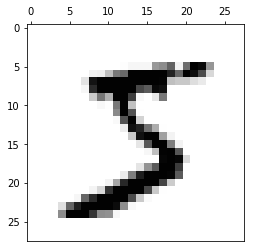

In [8]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(X_train[0], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

## Pre Processing the Dataset ##

In [11]:
# Reshape the training and test examples 
train_x_flatten = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_test.reshape(X_test.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (784, 60000)
test_x's shape: (784, 10000)


In [21]:
#Format response variable y
train_y = y_train.reshape(1, y_train.shape[0])
test_y = y_test.reshape(1, y_test.shape[0])

print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_y's shape: (1, 60000)
test_y's shape: (1, 10000)


In [13]:
#Desired format transpose to get each example in one column

In [15]:
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import * #This contains both the models manually defined

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### Two Layered Model ###


Cost after iteration 0: 140.61639700156118
Cost after iteration 100: 21.58770731755647
Cost after iteration 200: 21.391918130303548
Cost after iteration 300: 21.283775105111566
Cost after iteration 400: 21.223330604031105
Cost after iteration 500: 21.191492248637317
Cost after iteration 600: 21.17488066864758
Cost after iteration 700: 21.165298318565814
Cost after iteration 800: 21.15805991317372
Cost after iteration 900: 21.15168405324795
Cost after iteration 1000: 21.14641058767146
Cost after iteration 1100: 21.142100162902324
Cost after iteration 1200: 21.138492819276188
Cost after iteration 1300: 21.135191524740584
Cost after iteration 1400: 21.132002824383076
Cost after iteration 1500: 21.12885104133149
Cost after iteration 1600: 21.12567471606035
Cost after iteration 1700: 21.1224172044275
Cost after iteration 1800: 21.118949169784948
Cost after iteration 1900: 21.11521118389185
Cost after iteration 2000: 21.111174086377552
Cost after iteration 2100: 21.106845515521098
Cost after

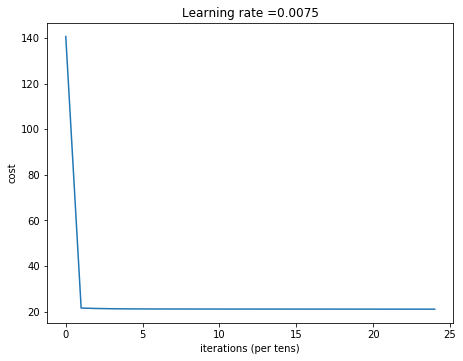

Accuracy: 0.0987166666667
Accuracy: 0.098
Cost after iteration 0: 140.6366749983716
Cost after iteration 100: 21.591050527133454
Cost after iteration 200: 21.392930475116387
Cost after iteration 300: 21.28265088150799
Cost after iteration 400: 21.22091562158054
Cost after iteration 500: 21.188249830393392
Cost after iteration 600: 21.17129752554857
Cost after iteration 700: 21.161922862562395
Cost after iteration 800: 21.15579356002867
Cost after iteration 900: 21.150063066491278
Cost after iteration 1000: 21.144100570515672
Cost after iteration 1100: 21.138027443006543
Cost after iteration 1200: 21.131657190758844
Cost after iteration 1300: 21.12502985883897
Cost after iteration 1400: 21.11825991357482
Cost after iteration 1500: 21.111495860303982
Cost after iteration 1600: 21.104855781767455
Cost after iteration 1700: 21.098458371565464
Cost after iteration 1800: 21.09238823870256
Cost after iteration 1900: 21.086699074798275
Cost after iteration 2000: 21.08137639045488
Cost after it

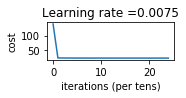

Accuracy: 0.0987166666667
Accuracy: 0.098
Cost after iteration 0: 140.67115988574147


KeyboardInterrupt: 

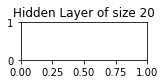

In [25]:
#Check for different hidden layers for 2 layered 
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [3, 10]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    n_x, n_y = 784,1
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = two_layer_model(train_x, train_y , layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
    #plot_decision_boundary(lambda x: predict(X.T,Y.T,parameters), X, Y)
    predictions_train = predict(train_x, train_y, parameters)
    predictions_test = predict(test_x, test_y, parameters)
    #accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    #print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

### L layered model###

In [30]:
### CONSTANTS ###
layers_dims = [784, 20, 7, 5, 1] #  5-layer model

Cost after iteration 0: 139.536112
Cost after iteration 100: 21.486755
Cost after iteration 200: 21.262256
Cost after iteration 300: 21.181821
Cost after iteration 400: 21.149363
Cost after iteration 500: 21.129477
Cost after iteration 600: 21.111393
Cost after iteration 700: 21.094226
Cost after iteration 800: 21.078575
Cost after iteration 900: 21.065244
Cost after iteration 1000: 21.053496
Cost after iteration 1100: 21.043099
Cost after iteration 1200: 21.033810
Cost after iteration 1300: 21.025150
Cost after iteration 1400: 21.016845
Cost after iteration 1500: 21.008707
Cost after iteration 1600: 21.000799
Cost after iteration 1700: 20.993289
Cost after iteration 1800: 20.986120
Cost after iteration 1900: 20.979123
Cost after iteration 2000: 20.972207
Cost after iteration 2100: 20.965337
Cost after iteration 2200: 20.958473
Cost after iteration 2300: 20.951590
Cost after iteration 2400: 20.944627


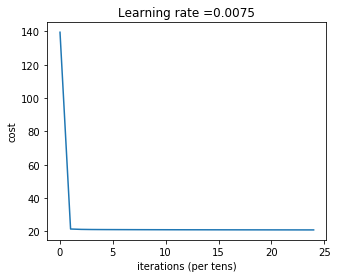

In [31]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [32]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.0987166666667


In [33]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.098


### Improve by he initialisation ###

### Improve by L2 regularization ###

### Improve by Dropout Regularization ###

# Keras for MLP #

Q: How hard can it be to build a Multi-Layer Fully-Connected Network with keras?

A: It is basically the same, just add more layers!

### Baseline model using MLP in Keras ###

In [40]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [41]:
#It is always a good idea to initialize the random number generator to a constant to ensure that the results of your script are reproducible.
# fix random seed for reproducibility

seed = 7
numpy.random.seed(seed)

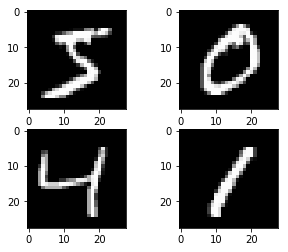

In [42]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [43]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [45]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [47]:
#Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. 
#As such, it is good practice to use a one hot encoding of the class values, transforming the vector of 
#class integers into a binary matrix.

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [48]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [50]:
#A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one 
#class of the 10 to be selected as the model’s output prediction. 
#Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and 
#the efficient ADAM gradient descent algorithm is used to learn the weights.

#We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. The test data is 
#used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used 
#to reduce the output to one line for each training epoch.

In [51]:
#Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

In [54]:
# build the model
model = baseline_model()

# Fit the model
baseline_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
6s - loss: 0.2754 - acc: 0.9200 - val_loss: 0.1419 - val_acc: 0.9587
Epoch 2/10
6s - loss: 0.1093 - acc: 0.9683 - val_loss: 0.0922 - val_acc: 0.9726
Epoch 3/10
6s - loss: 0.0703 - acc: 0.9799 - val_loss: 0.0768 - val_acc: 0.9762
Epoch 4/10
6s - loss: 0.0496 - acc: 0.9853 - val_loss: 0.0707 - val_acc: 0.9783
Epoch 5/10
6s - loss: 0.0357 - acc: 0.9898 - val_loss: 0.0671 - val_acc: 0.9784
Epoch 6/10
6s - loss: 0.0249 - acc: 0.9937 - val_loss: 0.0671 - val_acc: 0.9795
Epoch 7/10
7s - loss: 0.0192 - acc: 0.9950 - val_loss: 0.0603 - val_acc: 0.9799
Epoch 8/10
7s - loss: 0.0141 - acc: 0.9969 - val_loss: 0.0582 - val_acc: 0.9821
Epoch 9/10
7s - loss: 0.0113 - acc: 0.9973 - val_loss: 0.0666 - val_acc: 0.9801
Epoch 10/10
6s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0587 - val_acc: 0.9826
Baseline Error: 1.74%


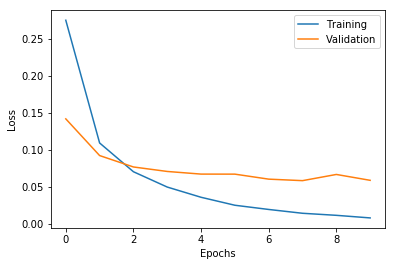

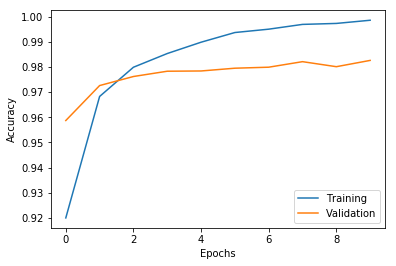

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(baseline_1)

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Improve model by adding one extra layer and add Dropout Layer ##

In [57]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, SGD

In [62]:
def mlp_dropout():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax')) #Notice output layer has 10 
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    return model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
8s - loss: 0.2749 - acc: 0.9147 - val_loss: 0.1250 - val_acc: 0.9625
Epoch 2/10
8s - loss: 0.1073 - acc: 0.9674 - val_loss: 0.0753 - val_acc: 0.9774
Epoch 3/10
8s - loss: 0.0755 - acc: 0.9767 - val_loss: 0.0895 - val_acc: 0.9722
Epoch 4/10
8s - loss: 0.0593 - acc: 0.9814 - val_loss: 0.0713 - val_acc: 0.9804
Epoch 5/10
8s - loss: 0.0471 - acc: 0.9856 - val_loss: 0.0705 - val_acc: 0.9808
Epoch 6/10
8s - loss: 0.0397 - acc: 0.9874 - val_loss: 0.0789 - val_acc: 0.9805
Epoch 7/10
8s - loss: 0.0347 - acc: 0.9889 - val_loss: 0.0755 - val_acc: 0.9809
Epoch 8/10
8s - loss: 0.0307 - acc: 0.9901 - val_loss: 0.0684 - val_acc: 0.9828
Epoch 9/10
8s - loss: 0.0283 - acc: 0.9913 - val_loss: 0.0792 - val_acc: 0.9819
Epoch 10/10
8s - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0702 - val_acc: 0.9839
Baseline Error: 1.61%


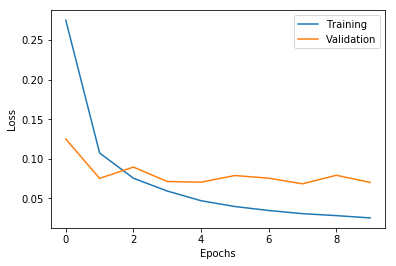

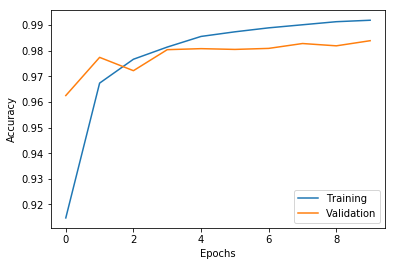

In [63]:
# build the model
model = mlp_dropout()

# Fit the model
ml = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plot_history(ml)

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [66]:
print('Model Input Tensors: ', model.input, end='\n\n')
print('Layers - Network Configuration:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Model Input Tensors:  Tensor("dense_9_input:0", shape=(?, 784), dtype=float32)

Layers - Network Configuration:

dense_9 True
Layer Configuration:
{'name': 'dense_9', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dropout_3 True
Layer Configuration:
{'name': 'dropout_3', 'trainable': True, 'rate': 0.2}
----------------------------------------
dense_10 True
Layer Configuration:
{'name': 'dense_10', 'trainable': True, 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {

In [65]:
#Compare for Different Learning Rates
#https://github.com/sukilau/Ziff-deep-learning/blob/master/3-CIFAR10-lrate/CIFAR10-lrate.ipynb

#CNN implemntation
#https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/